# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [6]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [7]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [246]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [247]:
df_train.shape

(15223, 52)

In [248]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [249]:
df_test.shape

(14910, 52)

In [250]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [251]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [286]:
df = df_test.append(df_train).reset_index(drop=True)

In [73]:
#df=pd.concat([df_train,df_test], ignore_index=True)

In [253]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [255]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее', 'Среднее специальное', 'Ученая степень', 'Два и более высших образования', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Торговля', 'Ресторанный бизнес/Общественное питание', 'Развлечения/Искусство', 'Банк/Финансы', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Недвижимость', 'Сельское хозяйство', 'Сборочные производства', 'Салоны красоты и здоровья', 'Туризм', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Строительство', 'Информационные услуги', 'Образование', 'Страхование', 'Логистика', 'Транспорт', 'Коммунальное хоз-во/Дорожные службы', 'Энергетика', 'Подбор персонала', 'Здравоохранение', 'Управляющая компания', 'Другие сферы', 'Маркетинг', 'Наука', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства'}


GEN_TITLE


REGION_NM
{'ПОВОЛЖСКИЙ', nan, 'ДАЛЬНЕВОСТОЧНЫЙ', 'ЦЕНТРАЛЬНЫЙ 2', 'УРАЛЬСКИЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС', 'ЦЕНТРАЛЬНЫЙ 1', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЮЖНЫЙ', 'ПРИВОЛЖСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'ЗАПАДНО-СИБИРСКИЙ'}


CREDIT
{'75581', '28790', '5380', '9296', '21595', '7766', '29970', '8580', '13225', '23160', '60720', '9310', '4240,91', '6545', '20007', '7459', '6455', '24475', '3442', '10442', '22085', '5772', '3565', '6209', '40050', '18250', '21062', '15975', '37480', '3699', '2957', '32481,83', '8530', '17091', '21590', '79200', '3415', '3045', '18632', '24552', '27510', '23406', '6202', '16364', '3770', '16798,2', '16436', '27820', '7490', '7471', '5827', '27369', '10611', '22188', '45863', '21919', '25950', '18224', '24675,85', '15602,5', '16428', '23128', '24295', '13360', '54000', '9983', '16030', '11900', '5817', '23758', '18010', '14292', '7163', '13240', '8180', '3385,83', '10446', '13200', '18296', '7386,75', '33340', '24580', '20300', '56518', '5687', '49490', '8295', '29460', '7399', 

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [287]:
df['PERSONAL_INCOME']=df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [288]:
df['CREDIT']=df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT']=df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT']=df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT']=df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

In [ ]:
Пропуски данных синхронно содержаться в столбцах, связанных с работой: 
    'GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','JOB_DIR'. 
Вероятно клиент не работает. Можно заполнить записью 'Не работает'
'WORK_TIME' заполняется 0

Столбец 'ORG_TP_FCAPITAL'

Поле 'TP_PROVINCE' остается пустым только  для Москвичей и жителей московской области. 
Его можно доопределить значением из поля 'POSTAL_ADDRESS_PROVINCE'
Поле 'PREVIOUS_CARD_NUM_UTILIZED' имеет смысл вообще удалить, так как его заполненность составляет 2%

In [289]:
def repl_data(a,b):
    df[df[a].isnull()]
    df[a]=df[a].fillna(b)
       
    return 

In [290]:
#Заполняем пустоты значением 'Не работает' в следующих столбцах:
repl_data('GEN_INDUSTRY','Не работает')
repl_data('GEN_TITLE','Не работает')
repl_data('ORG_TP_STATE','Не работает')
repl_data('ORG_TP_FCAPITAL','Не работает')
repl_data('JOB_DIR','Не работает')
# А для столбца 'WORK_TIME' - 0
repl_data('WORK_TIME',0)

#repl_data('')

In [ ]:
Заполняем пропуски в столбце 'TP_PROVINCE'
Данные пропущены для Москвы и Московской области.
Там где они есть лучшее совпадение с данными в столбце 'FACT_ADDRESS_PROVINCE'
Заполняем пропуски по принципу 'TP_PROVINCE' = 'FACT_ADDRESS_PROVINCE'

In [291]:
df[df['TP_PROVINCE'].isnull()]
df['TP_PROVINCE']=df['FACT_ADDRESS_PROVINCE']

In [ ]:
#Удаляем столбцы
'AGREEMENT_RK', 'PREVIOUS_CARD_NUM_UTILIZED'

In [301]:
df=df.drop(['AGREEMENT_RK','PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
TARGET                     30133 non-null int64
AGE                        30133 non-null int64
SOCSTATUS_WORK_FL          30133 non-null int64
SOCSTATUS_PENS_FL          30133 non-null int64
GENDER                     30133 non-null int64
CHILD_TOTAL                30133 non-null int64
DEPENDANTS                 30133 non-null int64
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
GEN_INDUSTRY               30133 non-null object
GEN_TITLE                  30133 non-null object
ORG_TP_STATE               30133 non-null object
ORG_TP_FCAPITAL            30133 non-null object
JOB_DIR                    30133 non-null object
FAMILY_INCOME              30133 non-null object
PERSONAL_INCOME            30133 non-null float64
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROVINCE      30133 non-null object
POSTAL_ADDRESS_

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Категориальные признаки пропкстить через onehotencoding 

In [303]:
df_ohe = pd.get_dummies(df)
#df = df.get_dummies(df, columns=['Sex', 'Embarked'])
#df.iloc[:,30:]

In [293]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 464 entries, AGREEMENT_RK to sample_train
dtypes: float64(7), int64(32), uint8(425)
memory usage: 21.2 MB


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [ ]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    return df_output

In [304]:
df_train_preproc = df_ohe.query('sample_train == 1')
df_test_preproc = df_ohe.query('sample_test == 1')
df_train_preproc=df_train_preproc.drop(['sample_train','sample_test'],axis=1)
df_test_preproc=df_test_preproc.drop(['sample_train','sample_test'],axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [305]:
#Тренировочные выборки
X=df_train_preproc.drop(['TARGET'], axis=1)
Y=df_train_preproc['TARGET']

#Тк=естовые выборки
X_Test=df_test_preproc.drop(['TARGET'], axis=1)
Y_Test=df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [335]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here


In [336]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#Разбиение на тренировочную и тестовую части происходит только на изначально тренировочном df, т.е на X, Y

In [337]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [355]:
#Проверяются черные ящики

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc = dtc.predict(x_test)
predict_dtc_prob = dtc.predict_proba(x_test)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict_rfc = rfc.predict(x_test)
predict_rfc_prob = rfc.predict_proba(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
predict_lr_prob = lr.predict_proba(x_test)

In [357]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    
print('precision_dtc', precision_score(y_test, predict_dtc))
print('recall_dtc', recall_score(y_test, predict_dtc))
print('accuracy_dtc', accuracy_score(y_test, predict_dtc))

print('precision_rfc', precision_score(y_test, predict_dtc))
print('recall_rfc', recall_score(y_test, predict_dtc))
print('accuracy_rfc', accuracy_score(y_test, predict_dtc))

print('precision_lr', precision_score(y_test, predict_lr))
print('recall_lr', recall_score(y_test, predict_lr))
print('accuracy_lr', accuracy_score(y_test, predict_lr))

precision_dtc 0.1631321370309951
recall_dtc 0.18018018018018017
accuracy_dtc 0.7880446682723888
precision_rfc 0.1631321370309951
recall_rfc 0.18018018018018017
accuracy_rfc 0.7880446682723888
precision_lr 0.2857142857142857
recall_lr 0.0036036036036036037
accuracy_lr 0.877819137289249


In [ ]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

In [358]:
from sklearn.metrics import precision_recall_curve

(-0.01, 1.01)

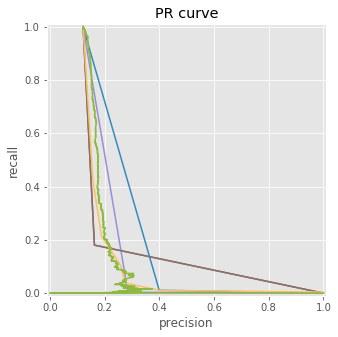

In [359]:
#Построение precision_recall_curve
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_dtc)
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, predict_rfc)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, predict_lr)

precision_dtc_prob, recall_dtc_prob, thresholds_dtc_prob = precision_recall_curve(y_test, predict_dtc_prob[:,1])
precision_rfc_prob, recall_rfc_prob, thresholds_rfc_prob = precision_recall_curve(y_test, predict_rfc_prob[:,1])
precision_lr_prob, recall_lr_prob, thresholds_lr_prob = precision_recall_curve(y_test, predict_lr_prob[:,1])

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))

plt.plot(precision_dtc, recall_dtc)
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lr, recall_lr)

plt.plot(precision_dtc_prob, recall_dtc_prob)
plt.plot(precision_rfc_prob, recall_rfc_prob)
plt.plot(precision_lr_prob, recall_lr_prob)

#plt.figure(figsize=(5, 5))
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)

plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

(-0.01, 1.01)

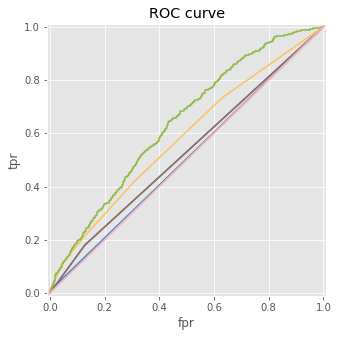

In [360]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_dtc)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, predict_rfc)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_lr)

fpr_dtc_prob, tpr_dtc_prob, thresholds = roc_curve(y_test, predict_dtc_prob[:,1])
fpr_rfc_prob, tpr_rfc_prob, thresholds = roc_curve(y_test, predict_rfc_prob[:,1])
fpr_lr_prob, tpr_lr_prob, thresholds = roc_curve(y_test, predict_lr_prob[:,1])

plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)

plt.plot(fpr_dtc_prob, tpr_dtc_prob)
plt.plot(fpr_rfc_prob, tpr_rfc_prob)
plt.plot(fpr_lr_prob, tpr_lr_prob)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [361]:
print('roc_auc_dts',roc_auc_score(y_test, predict_dtc))
print('roc_auc_rfc',roc_auc_score(y_test, predict_rfc))
print('roc_auc_lr',roc_auc_score(y_test, predict_lr))
print('roc_auc_dts_prob',roc_auc_score(y_test, predict_dtc_prob[:,1]))
print('roc_auc_rfc_prob',roc_auc_score(y_test, predict_rfc_prob[:,1]))
print('roc_auc_lr_prob',roc_auc_score(y_test, predict_lr_prob[:,1]))

roc_auc_dts 0.5261568896912865
roc_auc_rfc 0.5042837703106895
roc_auc_lr 0.5011786711936264
roc_auc_dts_prob 0.5261568896912865
roc_auc_rfc_prob 0.5791070482246954
roc_auc_lr_prob 0.6370914284174504


In [362]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

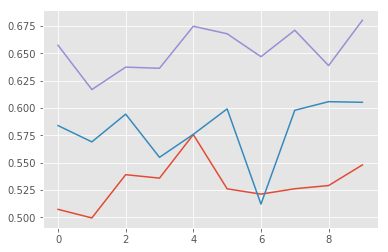

In [363]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
lr1 = LogisticRegression()
plt.plot(cross_val_score(dtc1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(rfc1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(lr1,X,Y,scoring='roc_auc',cv=10))


In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

(-0.01, 1.01)

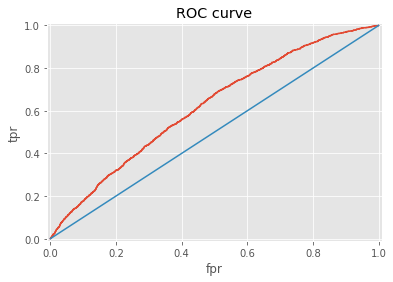

In [364]:
#Лучшая модель -- это логистическая регрессия
predict_lr_prob = lr.predict_proba(X_Test)
fpr_lr_prob, tpr_lr_prob, thresholds = roc_curve(Y_Test, predict_lr_prob[:,1])

plt.plot(fpr_lr_prob, tpr_lr_prob)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Померить roc_auc на тесте


In [365]:
print('roc_auc_lr_prob_Test',roc_auc_score(Y_Test, predict_lr_prob[:,1]))

roc_auc_lr_prob_Test 0.6196498480243161
